In [40]:
library(ggplot2)
 
library(readr)
library(gmodels)
library(ggpubr)
library(vioplot)
 

In [41]:
library(ARTool)

Загрузка данных

In [42]:
train <- read.csv('train.csv', sep =',' )

In [43]:
train$Property_ID <- NULL
train$locality <- NULL

Создание факторных переменных

In [44]:
train$price <- log( train$price )

In [45]:
cat_cols <- colnames(train)[ (colnames(train) != 'area') & (colnames(train) != 'security_deposit')
                           & (colnames(train) !=  'price')]

In [46]:
length( cat_cols ) 

[1] 16

In [8]:
cat_cols

[1] "room"            "layout_type"     "property_type"   "furnish_type"   
 [5] "bathroom"        "city"            "parking_spaces"  "floor"          
 [9] "pet_friendly"    "power_backup"    "washing_machine" "air_conditioner"
[13] "geyser.solar"    "CCTV.security"   "lift"            "neighbourhood"

In [47]:
for ( I in cat_cols){
    train[,I] <- as.factor( train[,I] )
    
}

Построение графиков boxplot и vionlin plot. Они помогают увидеть отличия в распределении цены в группах.

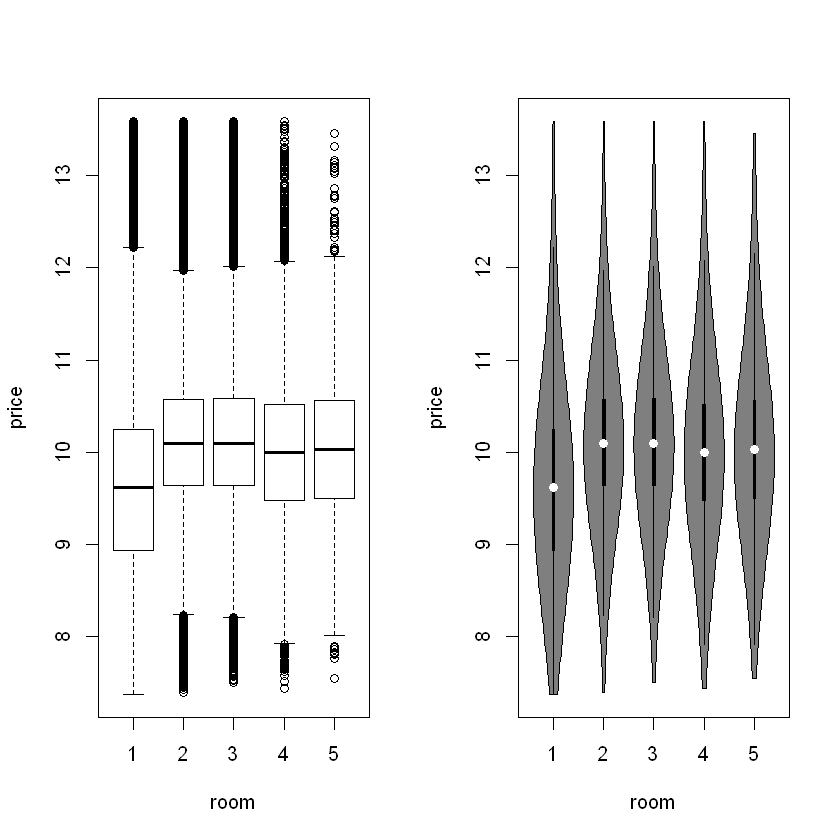

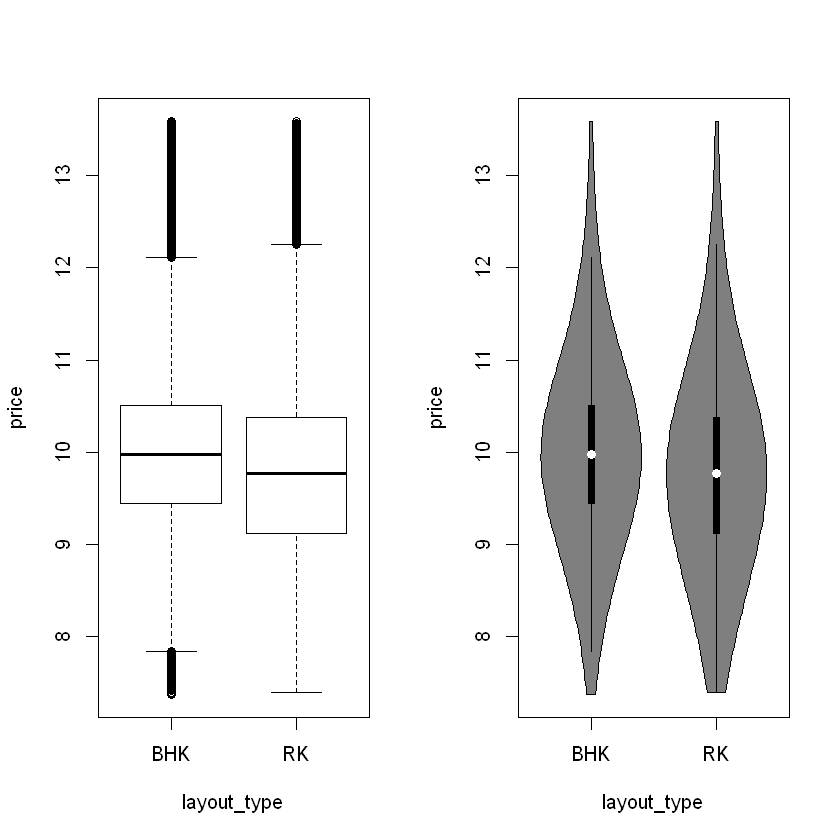

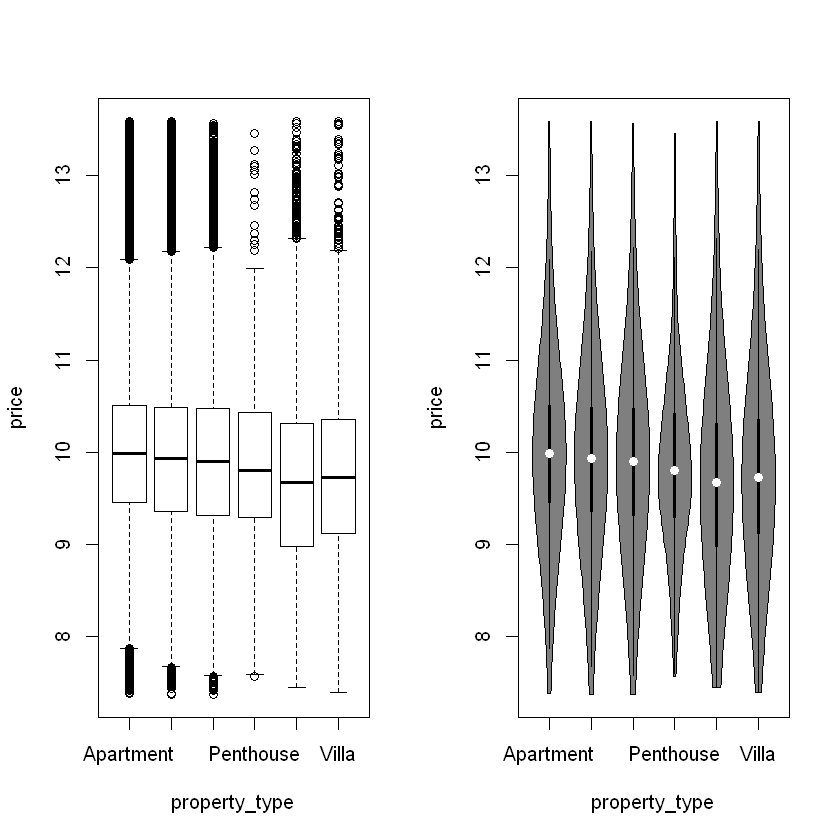

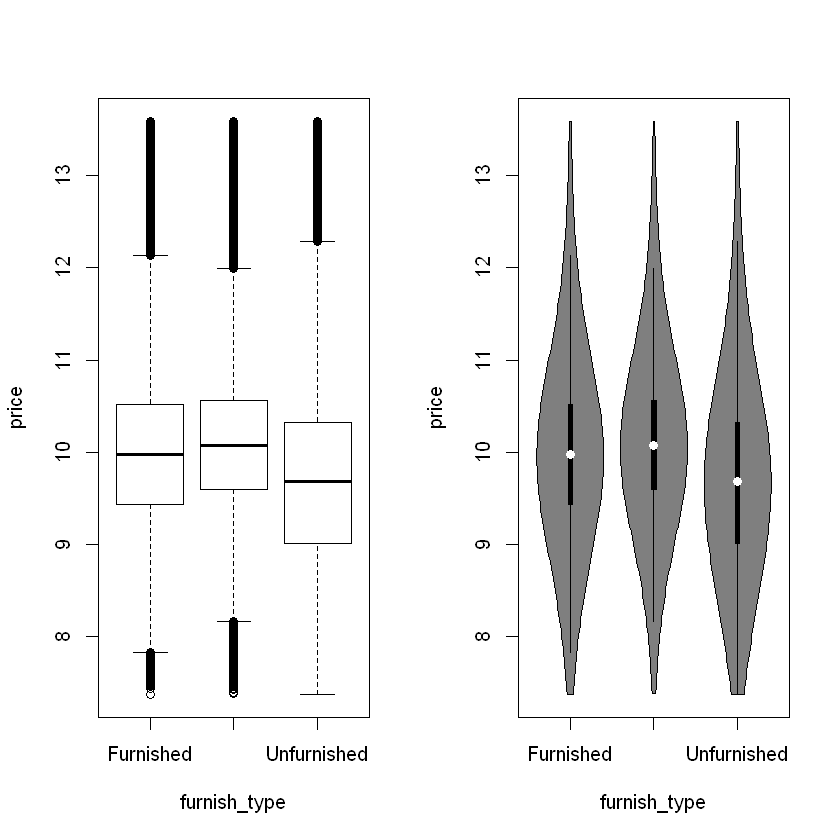

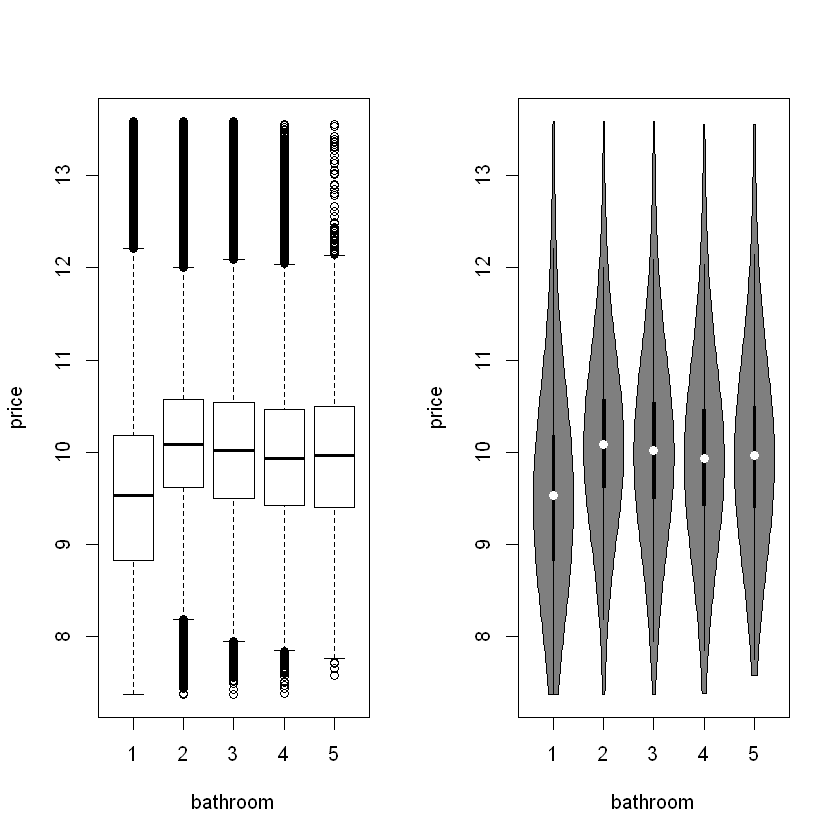

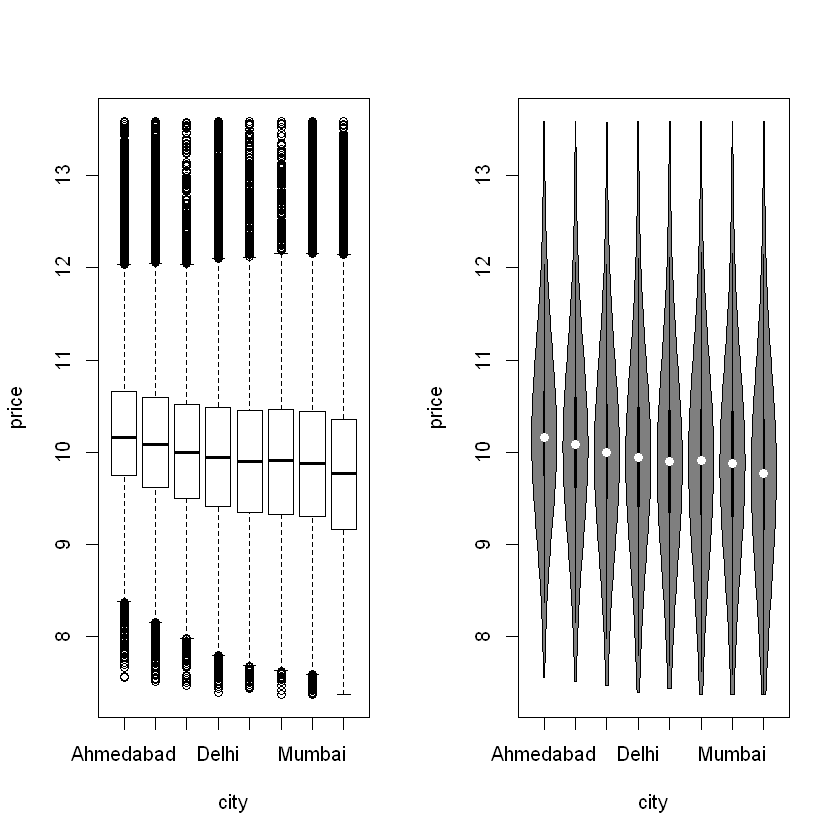

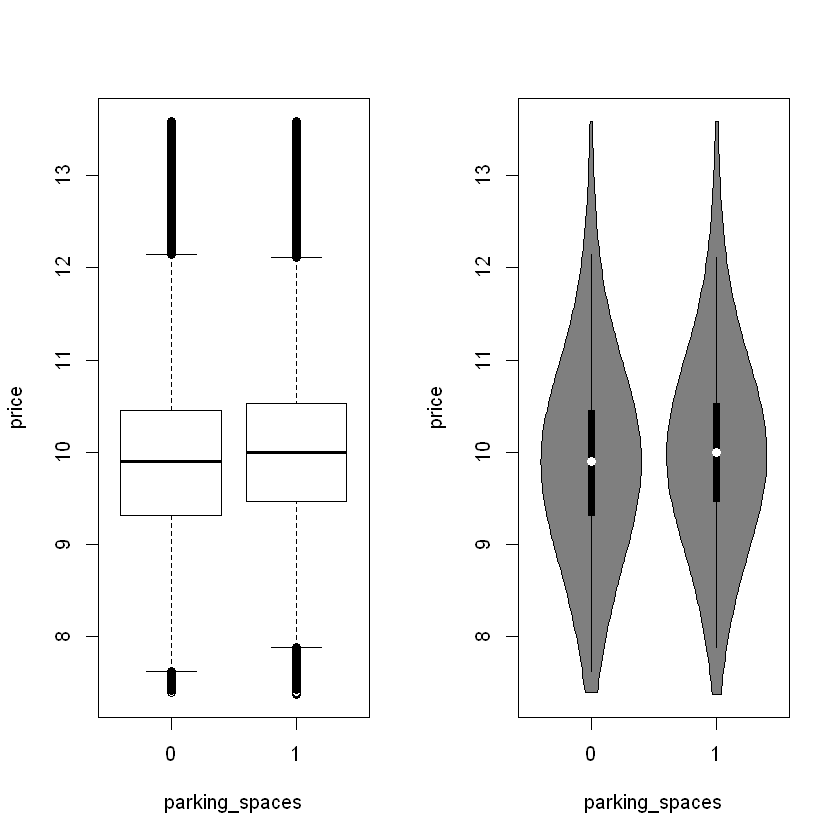

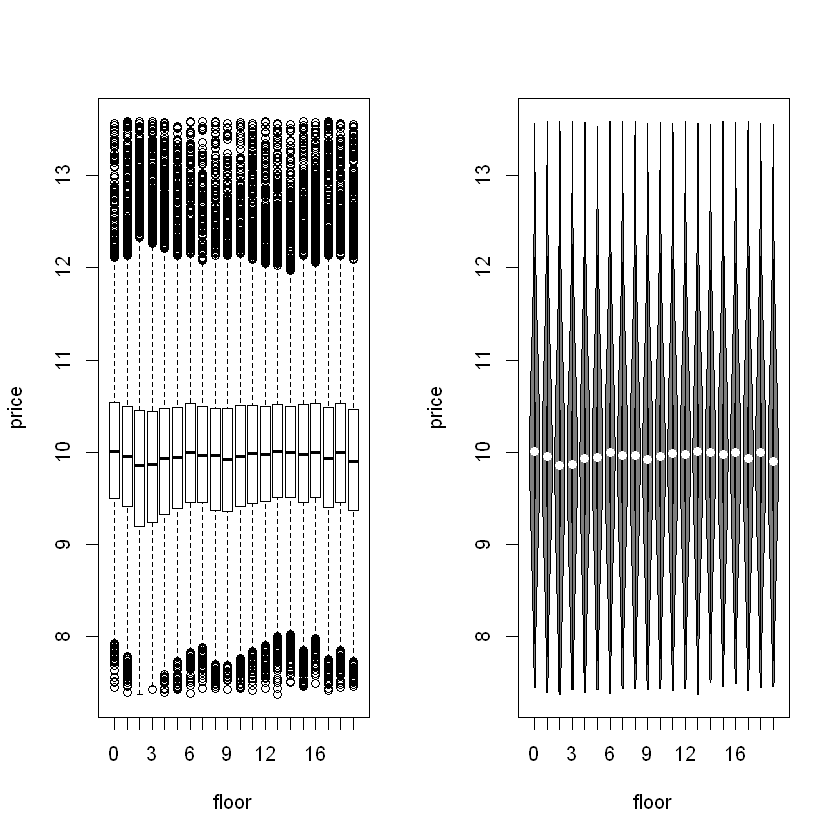

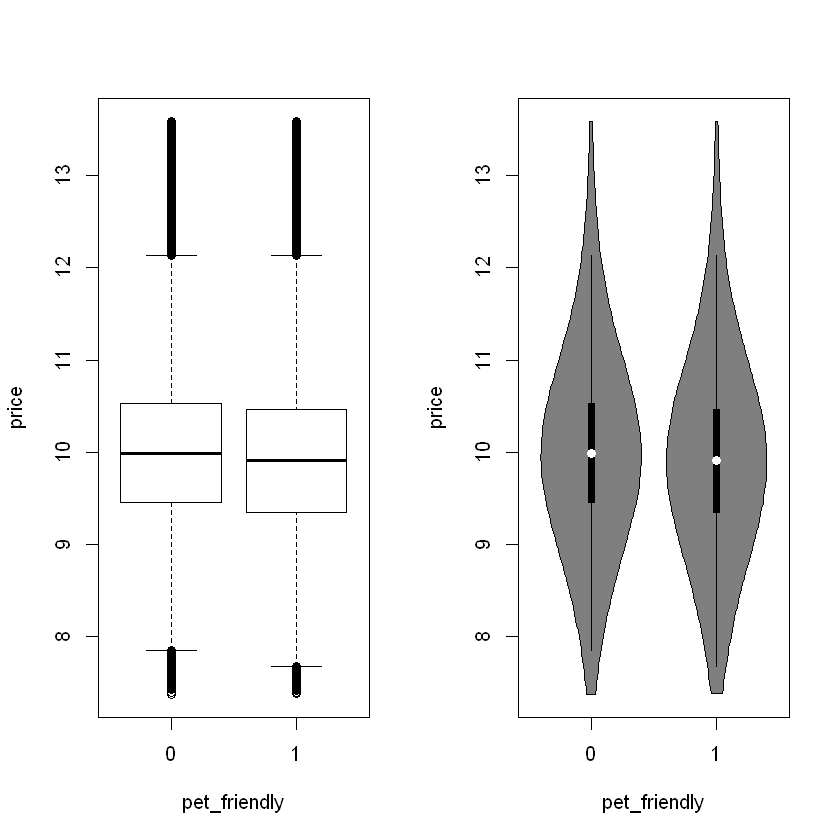

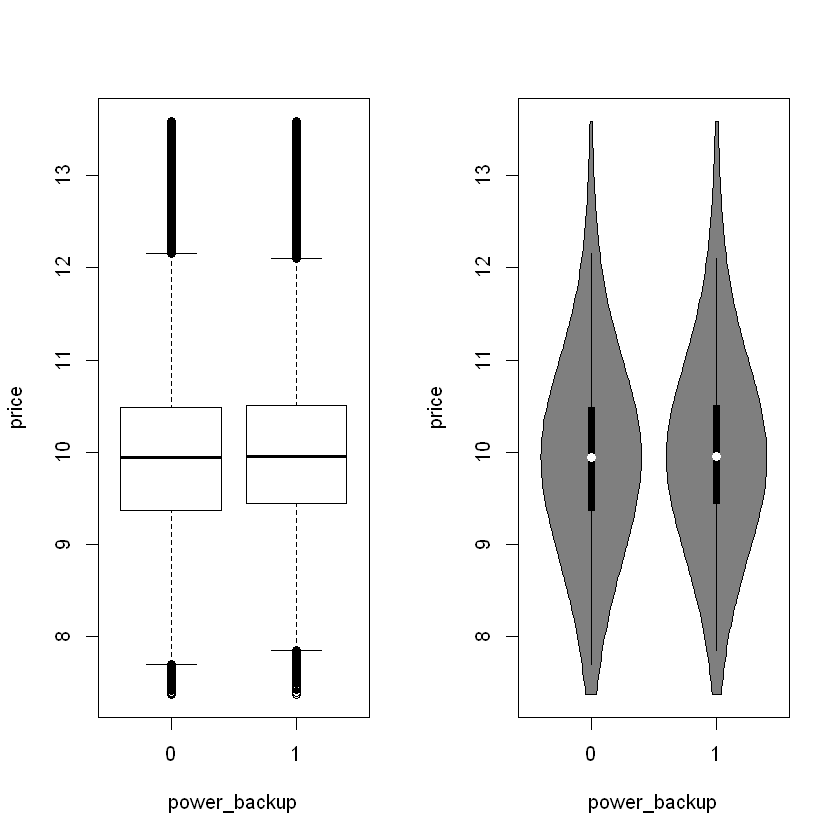

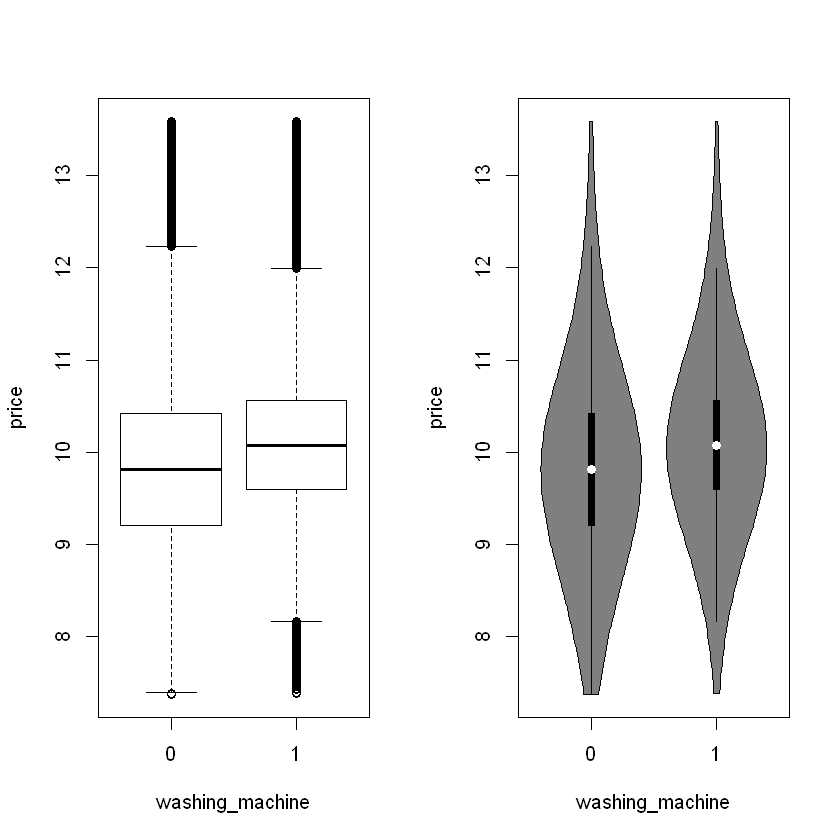

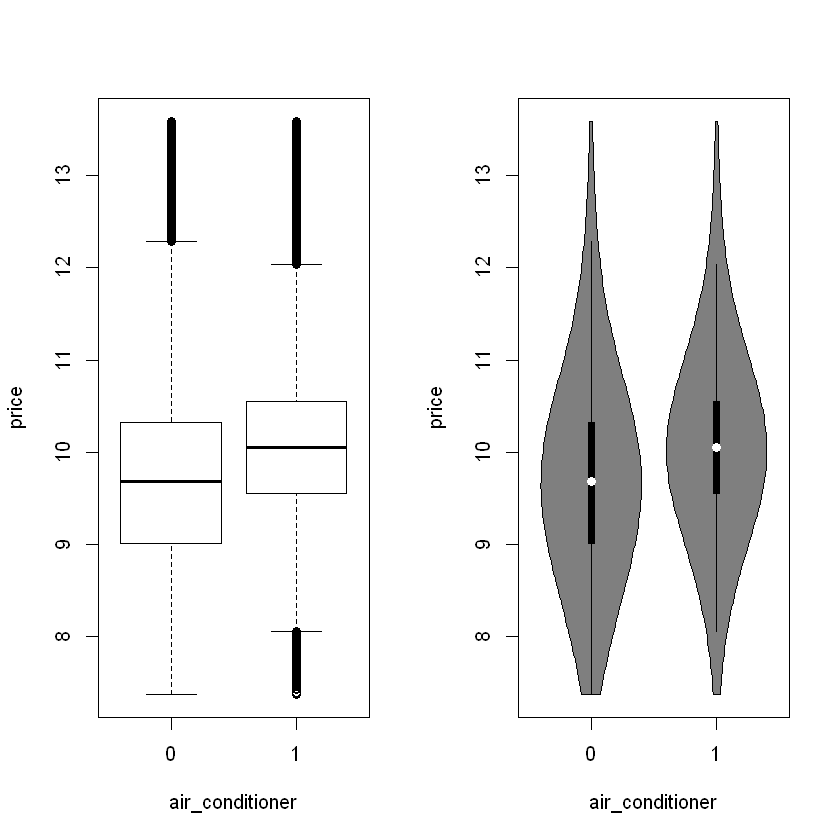

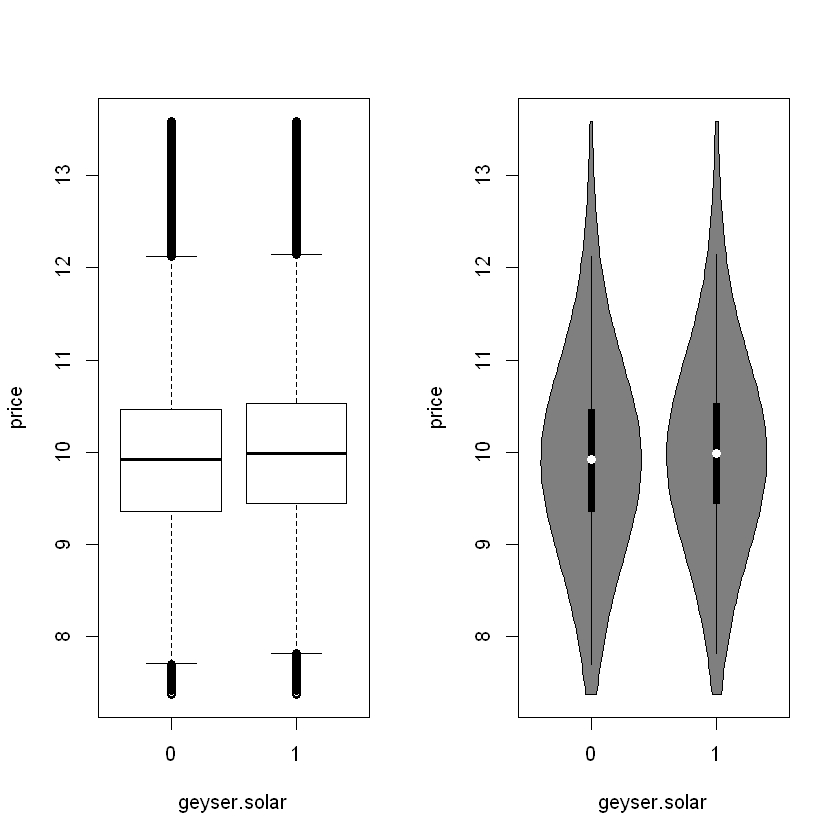

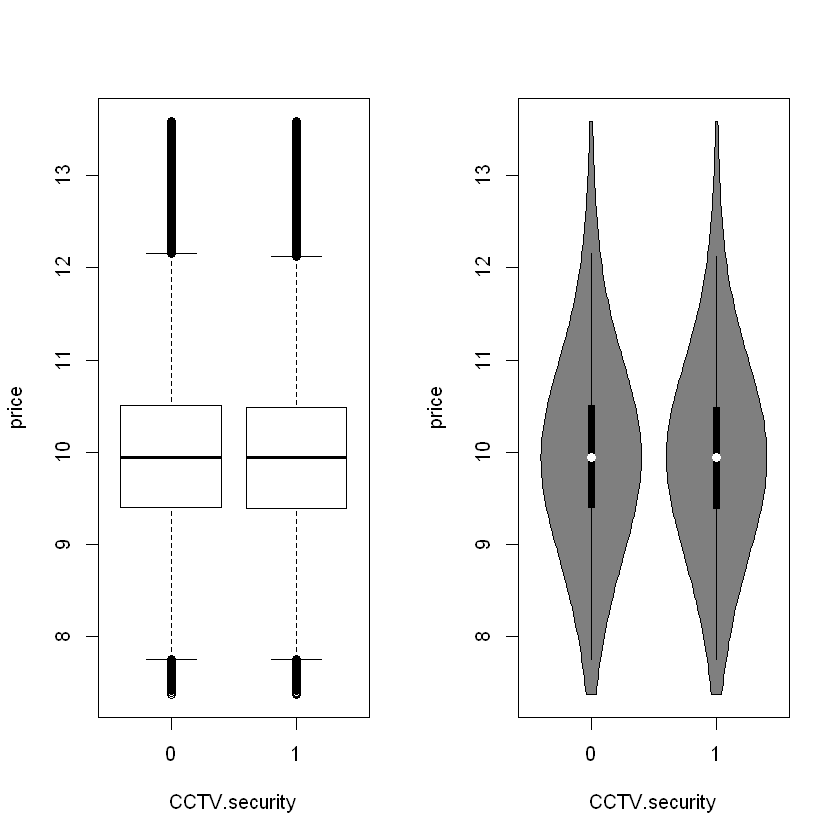

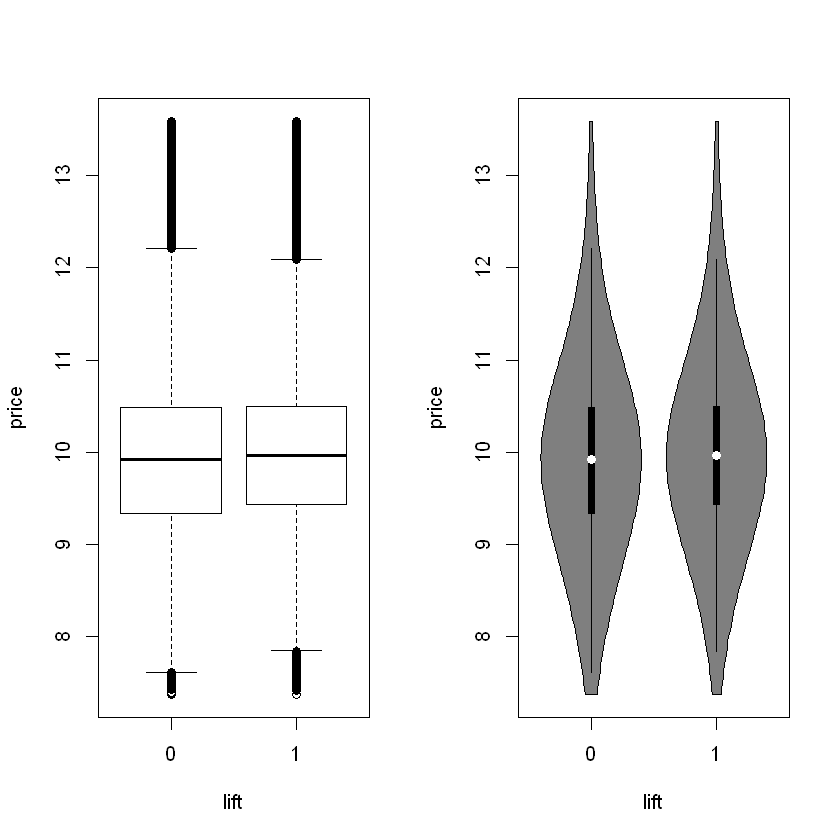

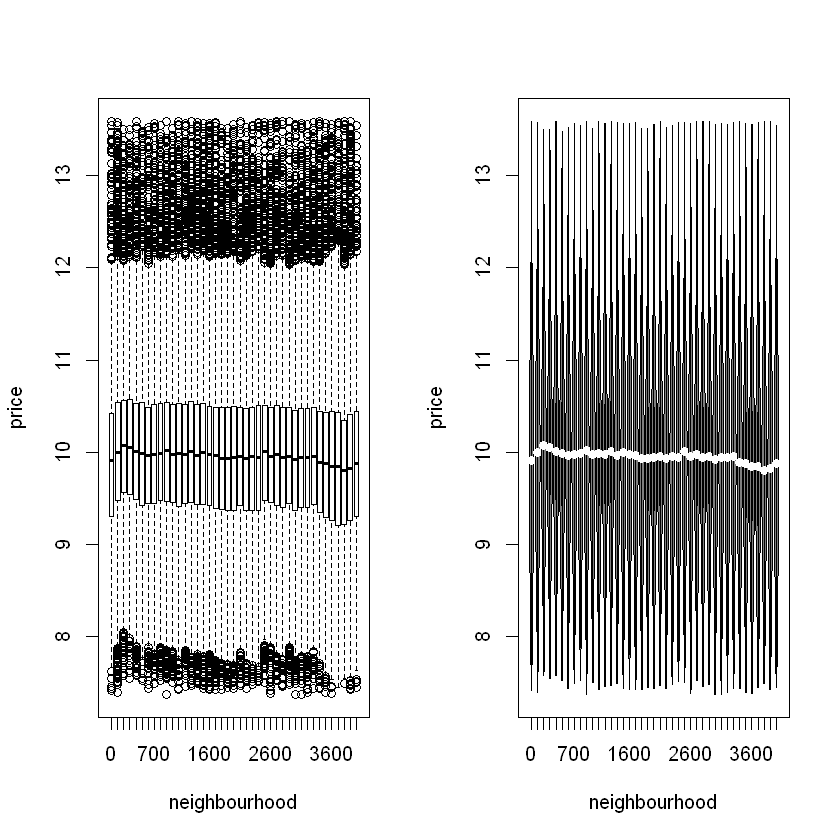

In [134]:
for ( i in 1: 16){
    cat_ftr <- cat_cols[ i ]
    par(mfrow=c(1,2))
    boxplot( as.formula( paste( 'price ~ ', cat_ftr ) ) , data = train)
    vioplot( as.formula( paste( 'price ~ ', cat_ftr ) ) , data = train)
}

Из графиков видно что медианы уровней факторных переменных находятся близко. И распределение price в группах ненормально. 

Следовательно, признаки нужно проверить тестом Краскела-Уолеса (непараметрический тест).

In [151]:
for ( i in 1: 16){
    cat_ftr <- cat_cols[ i ]
    ktest <- kruskal.test(as.formula( paste( 'price ~ ', cat_ftr ) ) , data = train)
    if (ktest$p.value <= 0.05){
        print(paste('Признак ' , cat_ftr , 'имеет стат. значимые различия в группах') )
    } else {
        print(paste('Признак ' , cat_ftr , 'не имеет стат. значимые различия в группах') )
    } 
    }

[1] "Признак  room имеет стат. значимые различия в группах"
[1] "Признак  layout_type имеет стат. значимые различия в группах"
[1] "Признак  property_type имеет стат. значимые различия в группах"
[1] "Признак  furnish_type имеет стат. значимые различия в группах"
[1] "Признак  bathroom имеет стат. значимые различия в группах"
[1] "Признак  city имеет стат. значимые различия в группах"
[1] "Признак  parking_spaces имеет стат. значимые различия в группах"
[1] "Признак  floor имеет стат. значимые различия в группах"
[1] "Признак  pet_friendly имеет стат. значимые различия в группах"
[1] "Признак  power_backup имеет стат. значимые различия в группах"
[1] "Признак  washing_machine имеет стат. значимые различия в группах"
[1] "Признак  air_conditioner имеет стат. значимые различия в группах"
[1] "Признак  geyser.solar имеет стат. значимые различия в группах"
[1] "Признак  CCTV.security имеет стат. значимые различия в группах"
[1] "Признак  lift имеет стат. значимые различия в группах"
[1] "П

Признаки имеют стат. значимые  различия в группах.

Анализ парных взаимодейтствий, найденных ранее (файл - two_way_inter_train_ED.csv).

Анализ производится при помощи пакета ARTool. Используется модификация теста ANOVA, содержащего ранговое преобразование.
Подробнее об этом методе и пакете написано [здесь](https://depts.washington.edu/acelab/proj/art/).

In [9]:
# загрузка файла
train_2_inter <- read.csv('two_way_inter_train_ED.csv', sep =',' )

In [40]:
# количество проверяемых взаимодейтсвий
length( colnames(train_2_inter) )

[1] 113

In [12]:
# стат. значимые взаимодейтсвия собираются в вектор neccesary_2_way
# затем в файле two_way_inter_train_ED.csv будут оставлены колонки из  neccesary_2_way

neccesary_2_way <- c()
col_names <- colnames(train_2_inter)
for ( i in 1: length( colnames(train_2_inter) ) ){
    inter <- paste( strsplit( col_names[i] , split = ".x.")[[1]] , collapse = ' * ' )
    inter_note <- paste( strsplit( col_names[i] , split = ".x.")[[1]] , collapse = ' и ' )
    fomula_ <- as.formula( paste( 'price ~ ' , inter , sep='') )
    
    Pval <-  anova(art( fomula_ , data= train) )[ 3, 'Pr(>F)']
    if  (Pval < 0.05) {
        print( paste(Pval ,  'Взаимодействие признаков ', inter_note ,
                     ' стат. значимо' , collapse = ' ', sep = ' ' ))
        neccesary_2_way <- c(neccesary_2_way ,col_names[i]  )
    } else {
        print( paste(Pval ,  'Взаимодействие признаков ', inter_note ,
                     ' стат. НЕ значимо' , collapse = ' ', sep = ' ' ))
    }
    
}

[1] "3.13347180285149e-30 Взаимодействие признаков  room и layout_type  стат. значимо"
[1] "4.51018115971511e-20 Взаимодействие признаков  room и property_type  стат. значимо"
[1] "1.64321750304982e-50 Взаимодействие признаков  room и furnish_type  стат. значимо"
[1] "5.09838979027152e-51 Взаимодействие признаков  room и bathroom  стат. значимо"
[1] "3.24471816224992e-22 Взаимодействие признаков  room и city  стат. значимо"
[1] "8.22769423480543e-09 Взаимодействие признаков  room и parking_spaces  стат. значимо"
[1] "5.86347311021697e-42 Взаимодействие признаков  room и floor  стат. значимо"
[1] "0.0678966531077156 Взаимодействие признаков  room и pet_friendly  стат. НЕ значимо"
[1] "2.16964712682892e-11 Взаимодействие признаков  room и power_backup  стат. значимо"
[1] "7.07358861379261e-74 Взаимодействие признаков  room и washing_machine  стат. значимо"
[1] "1.86134871109024e-36 Взаимодействие признаков  room и air_conditioner  стат. значимо"
[1] "0.00010934093403505 Взаимодействие пр

In [13]:
length( neccesary_2_way )

[1] 77

Запись нужных колонок в новый датафрейм

In [14]:
new_train_2_inter <- train_2_inter[ , neccesary_2_way]

Удаление из памяти старого датафрейма

In [28]:
rm( train_2_inter )


Запись в csv нового датафрейма

In [23]:
write.csv( x= new_train_2_inter , file =  'two_way_inter_train_ED_check.csv' , row.names = FALSE,quote = FALSE, sep= ","  )

Warning message in write.csv(x = new_train_2_inter, file = "two_way_inter_train_ED_check.csv", :
"attempt to set 'sep' ignored"


Box plot для трех статистически незначимых взаимодействий

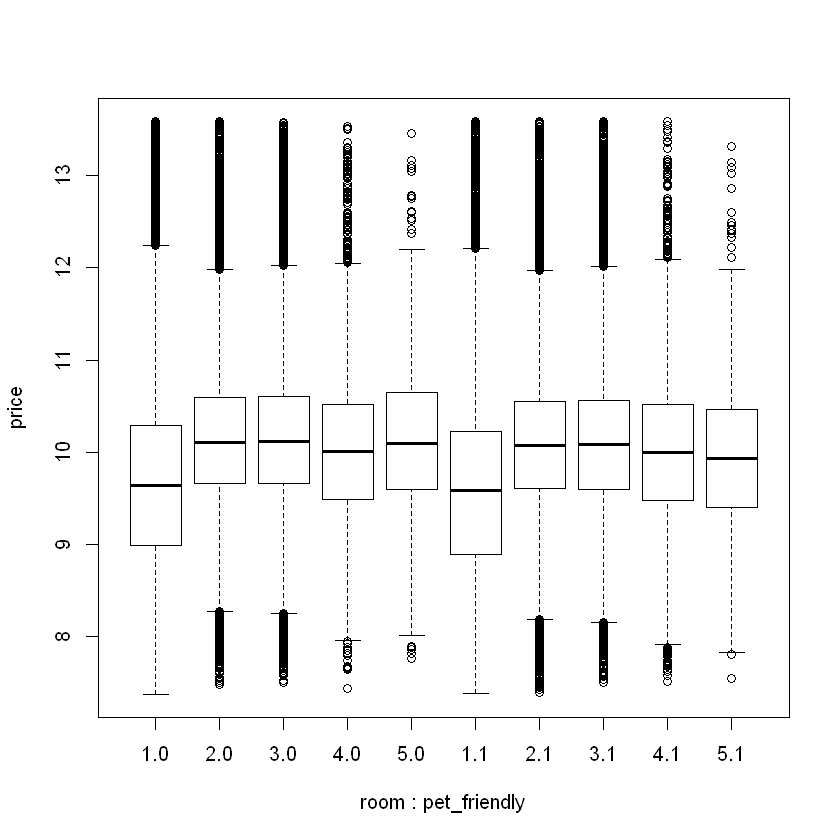

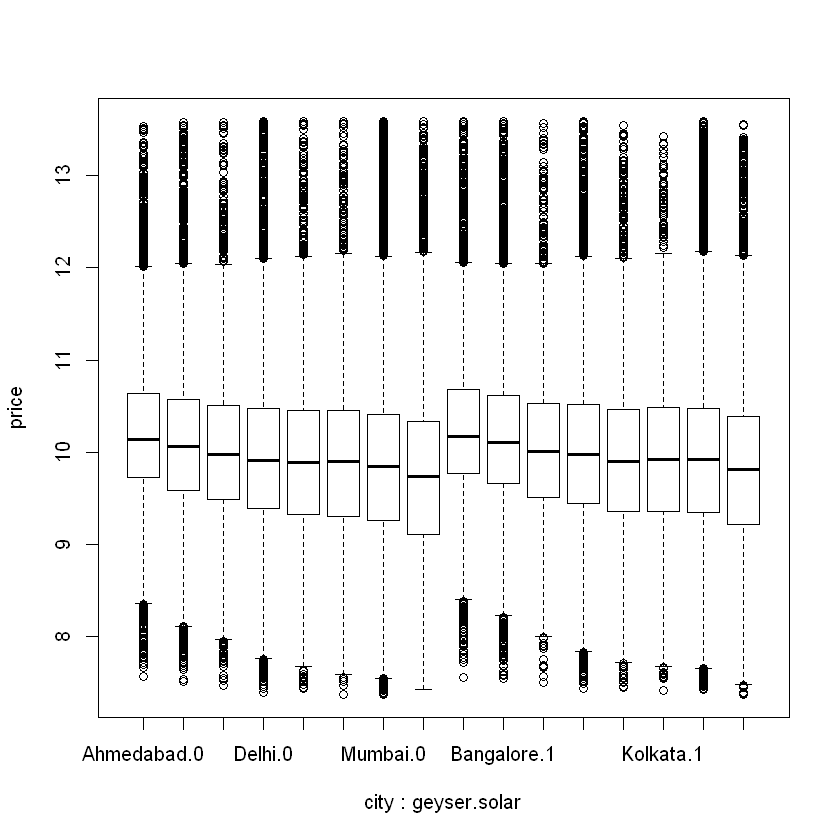

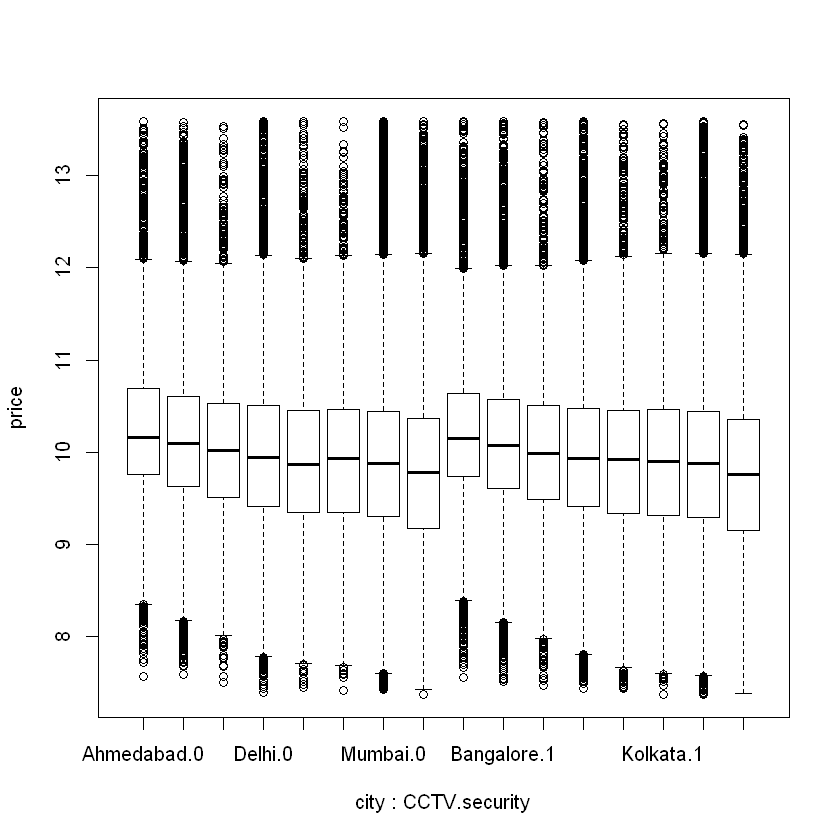

In [25]:
boxplot( price ~  room * pet_friendly, data = train)
boxplot( price ~   city * geyser.solar, data = train)
boxplot( price ~   city * CCTV.security, data = train)

Из графиков видо, что положение медиан и других показателей групп почти не меняется при смене значения одного из факторов.

Например взаимодейтсвие room и pet_friendly. Изменение значения факторов не меняет положения медиан и других показателей групп.

Box plot для трех статистически значимых взаимодействий

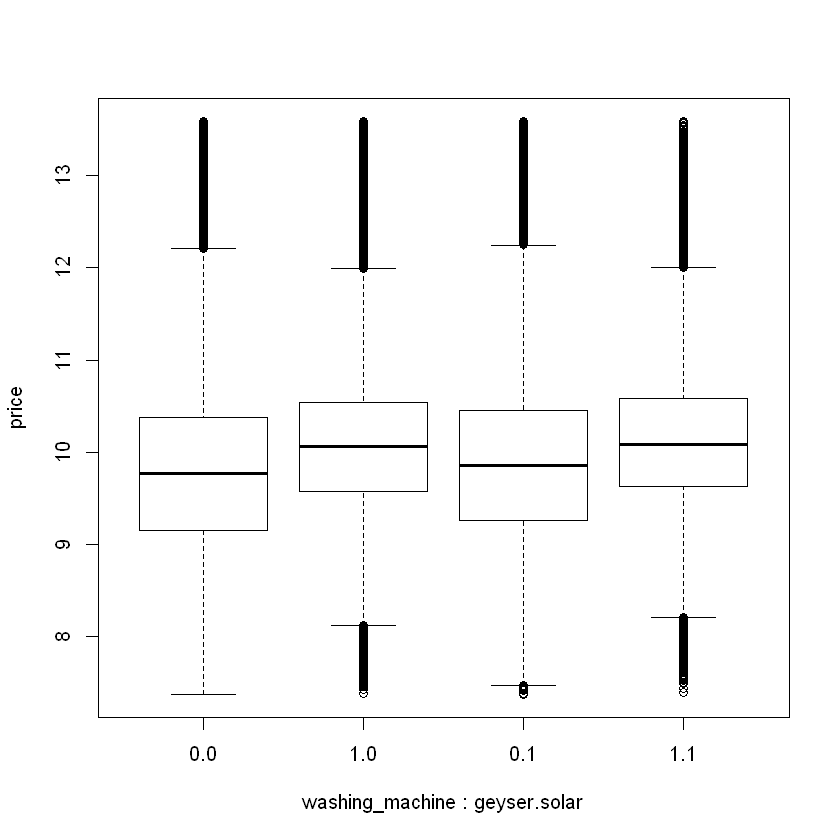

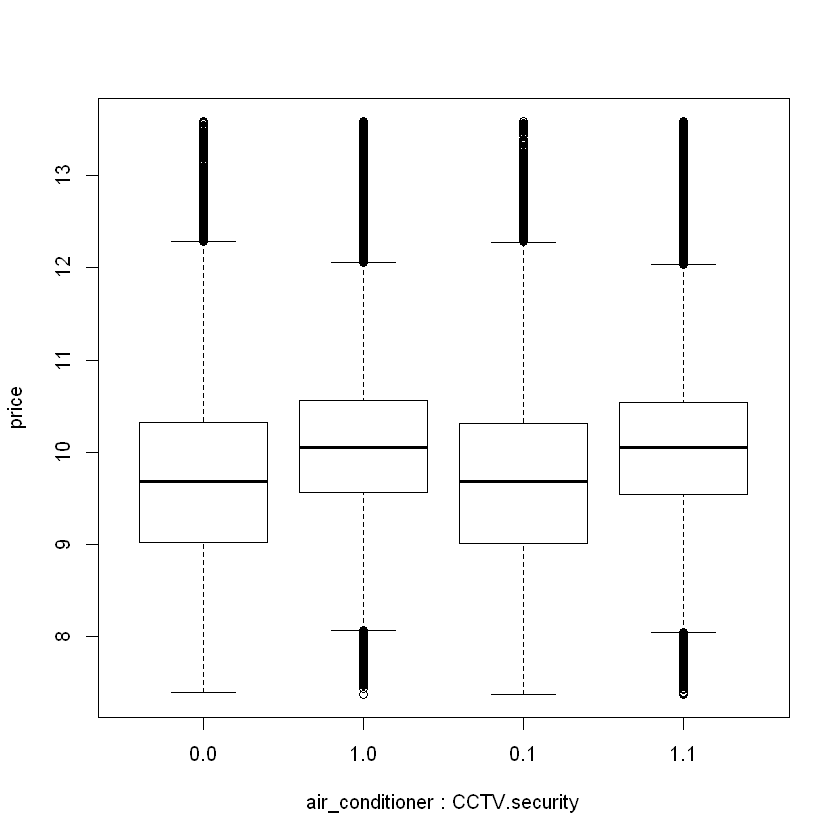

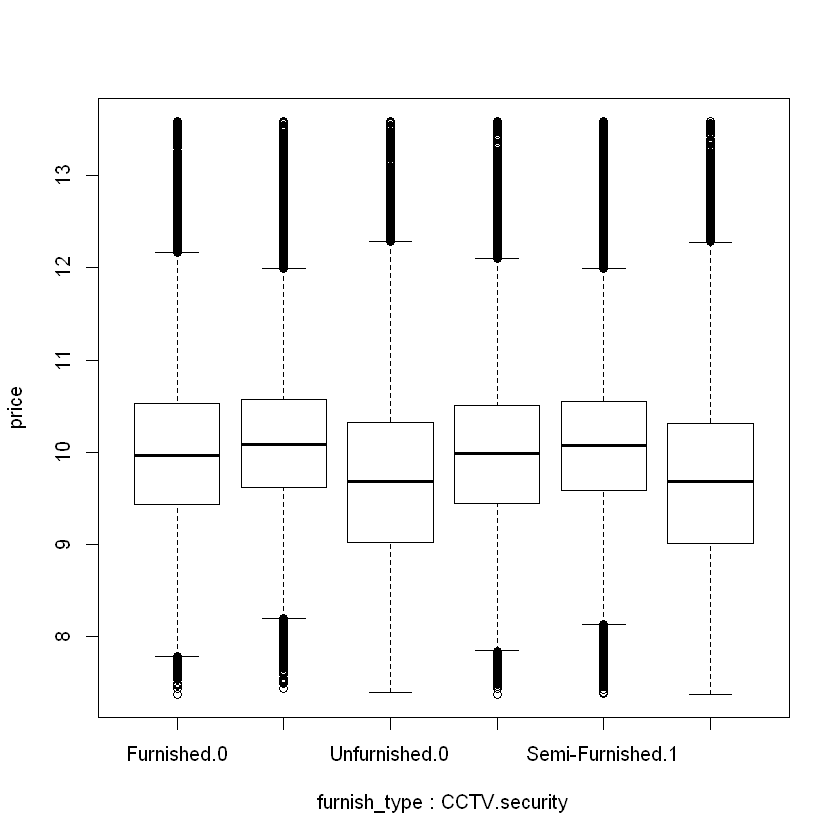

In [27]:
boxplot( price ~washing_machine * geyser.solar, data = train)
boxplot( price ~   air_conditioner * CCTV.security, data = train)
boxplot( price ~  furnish_type * CCTV.security, data = train)

Анализ тройных взаимодейтсвий

Загрузка таблицы

In [9]:
# загрузка файла
train_3_inter <- read.csv('three_way_inter_train_ED.csv', sep =',' )

In [10]:
# количество проверяемых взаимодейтсвий
length( colnames(train_3_inter) )

[1] 376

In [11]:
# стат. значимые взаимодейтсвия собираются в вектор neccesary_2_way
# затем в файле three_way_inter_train_ED.csv будут оставлены колонки из  neccesary_3_way
# выполение данного скрипта может занять сутки из-за большого количества статистических тестов
neccesary_3_way <- c()
col_names <- colnames(train_3_inter)
N <- length( col_names  )
for ( i in 1: N ){
    ctab <- table( train[ , strsplit( col_names[ i ] , split = ".x.")[[1]] ] )
    if ( length( ctab[ ctab==0 ] ) == 0 ){ 
        inter <- paste( strsplit( col_names[i] , split = ".x.")[[1]] , collapse = ' * ' )
        inter_note <- paste( strsplit( col_names[i] , split = ".x.")[[1]] , collapse = ' и ' )
        fomula_ <- as.formula( paste( 'price ~ ' , inter , sep='') )
    
        Pval <-  anova(art( fomula_ , data= train) )[ 7, 'Pr(>F)']
        if  (Pval < 0.05) {
            print( paste(Pval ,  'Взаимодействие признаков ', inter_note ,
                     ' стат. значимо' , collapse = ' ', sep = ' ' ))
            neccesary_3_way <- c(neccesary_3_way ,col_names[i]  )
        } else {
            print( paste(Pval ,  'Взаимодействие признаков ', inter_note ,
                     ' стат. НЕ значимо' , collapse = ' ', sep = ' ' ))
        } }
    
}

[1] "0.00399779015520008 Взаимодействие признаков  room и layout_type и furnish_type  стат. значимо"
[1] "0.438026231505676 Взаимодействие признаков  room и layout_type и parking_spaces  стат. НЕ значимо"
[1] "0.160088880956469 Взаимодействие признаков  room и layout_type и pet_friendly  стат. НЕ значимо"
[1] "0.0244038832798962 Взаимодействие признаков  room и layout_type и power_backup  стат. значимо"
[1] "0.000603629252433488 Взаимодействие признаков  room и layout_type и washing_machine  стат. значимо"
[1] "0.0203547034177292 Взаимодействие признаков  room и layout_type и air_conditioner  стат. значимо"
[1] "0.257776042852576 Взаимодействие признаков  room и layout_type и geyser.solar  стат. НЕ значимо"
[1] "0.781427880616494 Взаимодействие признаков  room и layout_type и CCTV.security  стат. НЕ значимо"
[1] "0.00207428526689973 Взаимодействие признаков  room и layout_type и lift  стат. значимо"
[1] "0.0805512049190164 Взаимодействие признаков  room и furnish_type и parking_spaces 

In [35]:
length( neccesary_3_way )

[1] 53

In [18]:
N

[1] 376

Запись нужных колонок в новый датафрейм

In [36]:
new_train_3_inter <- train_3_inter[ , neccesary_3_way]

Удаление из памяти старого датафрейма

In [39]:
rm( train_3_inter )


Запись в csv нового датафрейма

In [37]:
write.csv( x= new_train_3_inter , file =  'three_way_inter_train_ED_check.csv' , row.names = FALSE,quote = FALSE, sep= ","  )

Warning message in write.csv(x = new_train_3_inter, file = "three_way_inter_train_ED_check.csv", :
"attempt to set 'sep' ignored"


Анализ четверных взаимодейтсвий

Имена столбцов для составления сочетаний по 4

In [70]:
nessecary_cat_cols <- c( 'layout_type','property_type','furnish_type', 'city','parking_spaces', 'pet_friendly','power_backup','washing_machine','air_conditioner','geyser.solar','CCTV.security','lift' )

In [71]:
length(nessecary_cat_cols)

[1] 12

Количество сочетаний по 4 из 12

In [73]:
nrow( table_4_inter )

[1] 495

Тестирование на стат. значимость взаимодействия всех 4 признаков

В расчет принимаются комбинации, имеющие в таблице сопряженности ячейки со значеним не менее 10.

In [74]:
table_4_inter <- t( combn(nessecary_cat_cols , 4) )
neccesary_4_way <- c()
#nrows( table_4_inter ) 
for ( i in 1:  nrow( table_4_inter ) ){
    ctab <- table( train[t( combn(nessecary_cat_cols , 4) )[ i , ]] )
    if ( length( ctab[ ctab<=10 ] ) == 0 ){ 
        inter <- paste( t( combn(nessecary_cat_cols , 4) )[ i, ], collapse = ' * ' )
        inter_note <- paste(t( combn(nessecary_cat_cols , 4) )[ i, ] , collapse = ' и ' )
        fomula_ <- as.formula( paste( 'price ~ ' , inter , sep='') )
        
        Pval <-  anova(art( fomula_ , data= train) )[ 15 , 'Pr(>F)']
        
        if  (Pval < 0.05) {
            print( paste(Pval ,  'Взаимодействие признаков ', inter_note ,
                     ' стат. значимо' , collapse = ' ', sep = ' ' ))
            neccesary_4_way <- c(neccesary_4_way , inter_note )
        } else {
            print( paste(Pval ,  'Взаимодействие ', inter_note ,
                     ' стат. НЕ значимо' , collapse = ' ', sep = ' ' ))
        }
        
    }
    
}

[1] "0.273452729659508 Взаимодействие  layout_type и property_type и parking_spaces и pet_friendly  стат. НЕ значимо"
[1] "0.716393543498941 Взаимодействие  layout_type и property_type и parking_spaces и air_conditioner  стат. НЕ значимо"
[1] "0.875290328673543 Взаимодействие  layout_type и property_type и parking_spaces и geyser.solar  стат. НЕ значимо"
[1] "0.0331568168766125 Взаимодействие признаков  layout_type и property_type и parking_spaces и CCTV.security  стат. значимо"
[1] "0.372965766996858 Взаимодействие  layout_type и property_type и parking_spaces и lift  стат. НЕ значимо"
[1] "0.244004633186126 Взаимодействие  layout_type и property_type и pet_friendly и power_backup  стат. НЕ значимо"
[1] "0.876044582235404 Взаимодействие  layout_type и property_type и pet_friendly и air_conditioner  стат. НЕ значимо"
[1] "0.614259661490773 Взаимодействие  layout_type и property_type и pet_friendly и geyser.solar  стат. НЕ значимо"
[1] "0.811967347937787 Взаимодействие  layout_type и pr

In [ ]:
Количество подходящих комбинаций

In [76]:
length(neccesary_4_way) 

[1] 28

Сохранение столбца с комбинациями в CSV файл

In [81]:
df4 <- as.data.frame(  neccesary_4_way )
colnames( df4) <- c('4_way_inter')

In [83]:
write.csv( x= df4 , file =  'fourw_way_inter.csv' , row.names = FALSE,quote = FALSE, sep= ","  )

Warning message in write.csv(x = df4, file = "fourw_way_inter.csv", row.names = FALSE, :
"attempt to set 'sep' ignored"
